# Color Deconvolution

In [1]:
from google.colab import drive
drive.mount('/content/drive')
%ls

Mounted at /content/drive
drive/  sample_data/


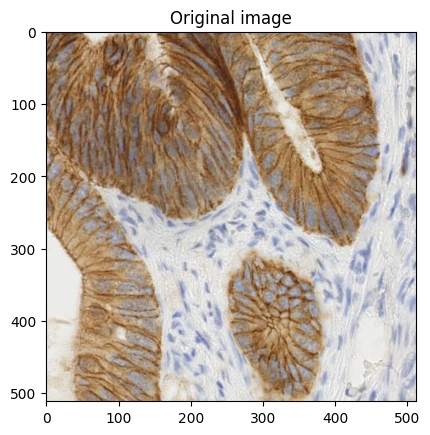

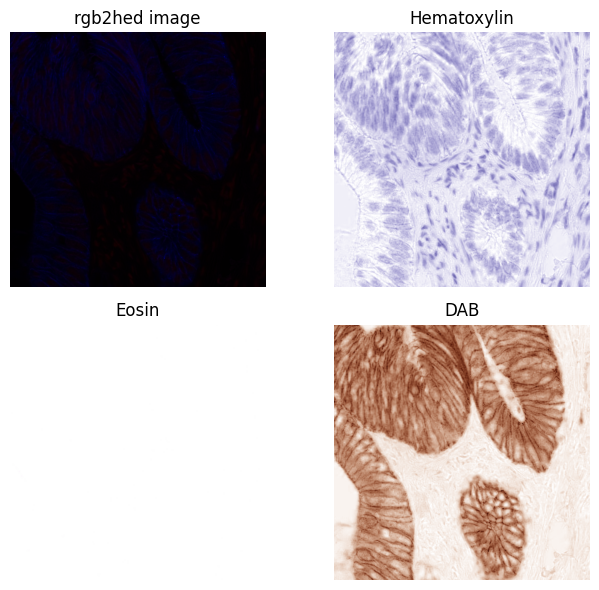

In [5]:
#https://scikit-image.org/docs/stable/auto_examples/color_exposure/plot_ihc_color_separation.html
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

from skimage import data
from skimage.color import rgb2hed, hed2rgb

# Example IHC image
ihc_rgb = data.immunohistochemistry()
# ihc_rgb = Image.open('/content/drive/MyDrive/hw/Lenna.jpg')
# ihc_rgb = Image.open('/content/drive/MyDrive/hw/tuberculosis-phone-0262.jpg')


# Separate the stains from the IHC image
ihc_hed = rgb2hed(ihc_rgb)
ihc_hed[ihc_hed<0] = 0  # TODO: remove this after fixing `rgb2hed()`

# Create an RGB image for each of the stains
null = np.zeros_like(ihc_hed[:, :, 0])
ihc_h = hed2rgb(np.stack((ihc_hed[:, :, 0], null, null), axis=-1))
ihc_e = hed2rgb(np.stack((null, ihc_hed[:, :, 1], null), axis=-1))
ihc_d = hed2rgb(np.stack((null, null, ihc_hed[:, :, 2]), axis=-1))


plt.figure(1)
plt.imshow(ihc_rgb)
plt.title("Original image")
plt.show()

# Display
fig, axes = plt.subplots(2, 2, figsize=(7, 6), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(ihc_hed)
ax[0].set_title("rgb2hed image")

ax[1].imshow(ihc_h)
ax[1].set_title("Hematoxylin")

ax[2].imshow(ihc_e)
ax[2].set_title("Eosin")  # Note that there is no Eosin stain in this image

ax[3].imshow(ihc_d)
ax[3].set_title("DAB")

for a in ax.ravel():
    a.axis('off')

fig.tight_layout()